In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pylab as plt
from sklearn.svm import SVC
import missingno as msno
from fancyimpute import KNN

Using TensorFlow backend.


In [209]:
m=pd.read_csv('origin_class.csv')
#d=pd.concat([m['风险等级'],d],axis=1)
#d.to_csv('origin.csv',encoding='utf-8-sig',index=False)

In [210]:
def KNNtrans(d):
    m= KNN(k=20).fit_transform(d)
    m=pd.DataFrame(m,columns=d.columns)
    return m
#d_np_corr=np.array(d.corr('spearman'))

In [211]:
d=m
d[1:]=KNNtrans(m[1:])

Imputing row 1/4031 with 1 missing, elapsed time: 14.416
Imputing row 101/4031 with 2 missing, elapsed time: 14.426
Imputing row 201/4031 with 0 missing, elapsed time: 14.437
Imputing row 301/4031 with 1 missing, elapsed time: 14.446
Imputing row 401/4031 with 1 missing, elapsed time: 14.460
Imputing row 501/4031 with 0 missing, elapsed time: 14.471
Imputing row 601/4031 with 0 missing, elapsed time: 14.481
Imputing row 701/4031 with 0 missing, elapsed time: 14.493
Imputing row 801/4031 with 3 missing, elapsed time: 14.503
Imputing row 901/4031 with 2 missing, elapsed time: 14.512
Imputing row 1001/4031 with 2 missing, elapsed time: 14.519
Imputing row 1101/4031 with 0 missing, elapsed time: 14.532
Imputing row 1201/4031 with 1 missing, elapsed time: 14.551
Imputing row 1301/4031 with 1 missing, elapsed time: 14.569
Imputing row 1401/4031 with 0 missing, elapsed time: 14.580
Imputing row 1501/4031 with 0 missing, elapsed time: 14.591
Imputing row 1601/4031 with 0 missing, elapsed time:

In [817]:
# 两两相除
a = pd.Series(d['风险等级'])

for i in range(len(d.columns)):
    col_i=d.columns[i]
    if col_i == '风险等级':
        continue
    for j in range(i,len(d.columns)):
        col_j=d.columns[j]
        if col_j == '风险等级':
            continue
        new_col_name = col_i + ' ÷ ' + col_j
        tmp = d.apply(lambda x: x[col_i] / (x[col_j] + 0.0001), axis=1)
        tmp_1= d.apply(lambda x: x[col_j] / (x[col_i] + 0.0001), axis=1)
        tmp_b = pd.Series(tmp)
        tmp_b_1= pd.Series(tmp_1)
        tmp_score = a.corr(tmp_b, method='spearman')
        tmp_score_1 = a.corr(tmp_b, method='spearman')
        if tmp_score >= 0.3 or tmp_score <= -0.3:
            kkk=a.corr(d[col_i],method='spearman')
            mmm=a.corr(d[col_j],method='spearman')
            if np.abs(tmp_score)>np.abs(kkk)+0.03 and np.abs(tmp_score)>np.abs(mmm)+0.03:
                print(new_col_name + ':', tmp_score, end='')
                #print('【*****】')
                print(' ',kkk,' ',mmm)
                #file_out = open('valuable_new_2.txt', 'a')
                #print(new_col_name + ':', tmp_score, file = file_out)
                #file_out.close()
        #else:
            #print()


金融信息关注程度a4002a ÷ 银行储蓄卡数量d1103: -0.4115368260144178  -0.33515436182055475   0.36242415716665227
金融信息关注程度a4002a ÷ 去年平均每月伙食费g1001: -0.3943337733594161  -0.33515436182055475   0.3097911528634667


KeyboardInterrupt: 

In [818]:
for i in range(len(d_np_corr)):
    for j in range(len(d_np_corr[i])):
        if d_np_corr[i][j]>=0.5:
            if i!=j:
                print(str(d_np_corr[i][j])+'  '+d.columns[i]+'  '+d.columns[j])

0.5406727502005961  金融信息关注程度a4002a  金融信息/伙食费
0.5589302548050061  金融信息关注程度a4002a  风险汇报选择/旅游


IndexError: index 23 is out of bounds for axis 0 with size 23

In [560]:
print(len(d_np_corr[0]))
for i in range(len(d_np_corr[0])):
    if np.abs(d_np_corr[0][i])<=0.3:
        print(str(d_np_corr[0][i])+'  '+d.columns[i]+'  '+d.columns[0])

29
-0.06054581934723006  互联网产品类别非2，3，7加权  风险等级
-0.050888924951964336  互联网产品类别2，3，7加权  风险等级
-0.27619314822488283  股票和基金风险更大a4007  风险等级
-0.2641495790851265  股票/耐用品  风险等级
0.26954708960200113  耐用品总价值c8002  风险等级
0.23394297132184125  活期存款余额d1105  风险等级
0.2328773905554694  定期存款总额d2104_imp  风险等级
0.2671245504918144  去年平均每月水/电/燃料费/物业g1005  风险等级
0.2736258319911396  去年平均每月购买日常用品支出g1006  风险等级
0.27750375295742913  去年平均每月本地交通支出g1008_imp  风险等级
0.2506461039510412  去年每月通信费支出g1009_imp  风险等级
0.28427640016163636  去年购买衣物支出g1011_imp  风险等级
0.18805503314990174  去年购买家庭耐用品支出g1014_imp  风险等级
0.13784967046088137  去年教育培训支出g1016_imp  风险等级


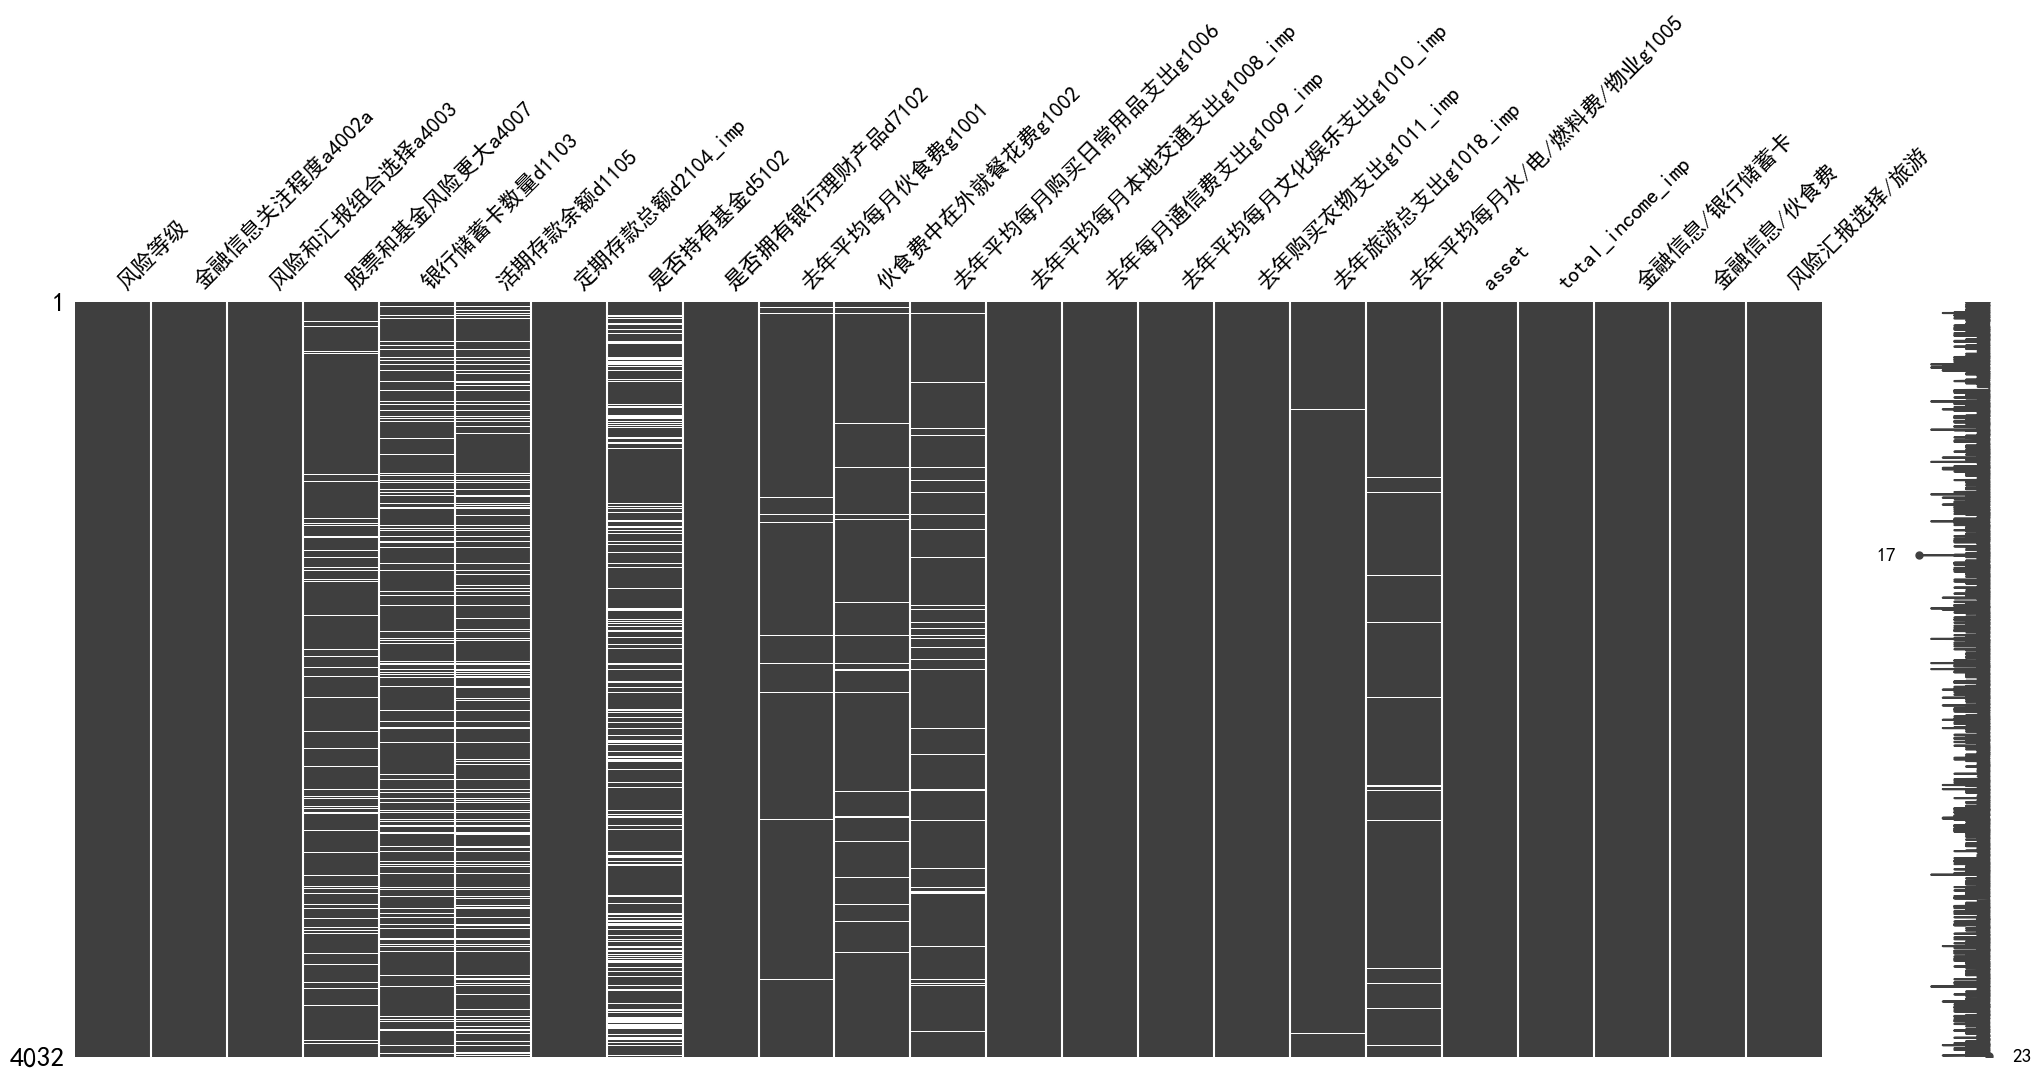

In [90]:
msno.matrix(d)

In [212]:
y=d['风险等级']
X=d.drop(['风险等级'],axis=1)

X_train=pd.DataFrame()
y_train=pd.DataFrame()
X_test=pd.DataFrame()
y_test=pd.DataFrame()
for i in range(5):
    d_temp=d[d['风险等级']==i]
    y=d_temp['风险等级']
    X=d_temp.drop(['风险等级'],axis=1)
    X_train_temp,X_test_temp,y_train_temp,y_test_temp =train_test_split(X,y,test_size=0.1,random_state=12)
    X_train=pd.concat([X_train,X_train_temp],axis=0)
    y_train=pd.concat([y_train,y_train_temp],axis=0)
    #for j in range(2):
    #    if i!=0:
    #        X_train=pd.concat([X_train,X_train_temp],axis=0)
    #        y_train=pd.concat([y_train,y_train_temp],axis=0)
    X_test=pd.concat([X_test,X_test_temp],axis=0)
    y_test=pd.concat([y_test,y_test_temp],axis=0)
    
#X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=12)
#train_X_y=pd.concat([y_train,X_train],axis=1)
#test_X_y=pd.concat([y_test,X_test],axis=1)

In [213]:
train_X_y=pd.concat([y_train,X_train],axis=1)
test_X_y=pd.concat([y_test,X_test],axis=1)
#train_X_y=KNNtrans(train_X_y)
train_X_y_temp=train_X_y.reset_index(drop=True)

train_X_y=train_X_y_temp[1900:].sample(frac=1,random_state=1)

test_X_y=test_X_y.sample(frac=1,random_state=1).reset_index(drop=True)

y_train=train_X_y[0]
X_train=train_X_y.drop([0],axis=1)
y_test=test_X_y[0]
X_test=test_X_y.drop([0],axis=1)

In [214]:
lgb_train = lgb.Dataset(X_train, y_train) 
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [215]:
params = {
    'task': 'train',
    'nthread':'6',
    'boosting_type': 'gbdt',  # 设置提升类型
    #'objective': 'multiclass', # 目标函数
    'objective': 'multiclass',
    'num_leaves': 10,   # 叶子节点数
    'learning_rate': 0.01,  # 学习速率
    'max_depth':4,
    'subsample':0.8,
    'colsample_bytree':0.6,
    'max_bin':10000,
    'min_data_in_leaf':10,
    'lambda_l1':3,
    'lambda_l2': 3,
    'feature_fraction': 0.9, # 建树的特征选择比例
    #'bagging_fraction': 0.9, # 建树的样本采样比例
    #'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1, # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
    'num_class':5
}
 
print('Start training...')

gbm = lgb.train(params,lgb_train,num_boost_round=2000,valid_sets=lgb_eval,early_stopping_rounds=100,categorical_feature=[1,2])

Start training...
[1]	valid_0's multi_logloss: 1.18293
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.17887
[3]	valid_0's multi_logloss: 1.17461
[4]	valid_0's multi_logloss: 1.1702
[5]	valid_0's multi_logloss: 1.16616
[6]	valid_0's multi_logloss: 1.16196
[7]	valid_0's multi_logloss: 1.15771
[8]	valid_0's multi_logloss: 1.15349
[9]	valid_0's multi_logloss: 1.14976
[10]	valid_0's multi_logloss: 1.14567
[11]	valid_0's multi_logloss: 1.14264
[12]	valid_0's multi_logloss: 1.13865
[13]	valid_0's multi_logloss: 1.13502
[14]	valid_0's multi_logloss: 1.13109
[15]	valid_0's multi_logloss: 1.12739
[16]	valid_0's multi_logloss: 1.1236
[17]	valid_0's multi_logloss: 1.1198
[18]	valid_0's multi_logloss: 1.11607
[19]	valid_0's multi_logloss: 1.11253
[20]	valid_0's multi_logloss: 1.10892
[21]	valid_0's multi_logloss: 1.10544
[22]	valid_0's multi_logloss: 1.1029
[23]	valid_0's multi_logloss: 1.09937
[24]	valid_0's multi_logloss: 1.09603
[25]	valid_0's multi

[210]	valid_0's multi_logloss: 0.828748
[211]	valid_0's multi_logloss: 0.82833
[212]	valid_0's multi_logloss: 0.827669
[213]	valid_0's multi_logloss: 0.82702
[214]	valid_0's multi_logloss: 0.826557
[215]	valid_0's multi_logloss: 0.825893
[216]	valid_0's multi_logloss: 0.825346
[217]	valid_0's multi_logloss: 0.824709
[218]	valid_0's multi_logloss: 0.824358
[219]	valid_0's multi_logloss: 0.823581
[220]	valid_0's multi_logloss: 0.822953
[221]	valid_0's multi_logloss: 0.822175
[222]	valid_0's multi_logloss: 0.82182
[223]	valid_0's multi_logloss: 0.821251
[224]	valid_0's multi_logloss: 0.820658
[225]	valid_0's multi_logloss: 0.820366
[226]	valid_0's multi_logloss: 0.819956
[227]	valid_0's multi_logloss: 0.819529
[228]	valid_0's multi_logloss: 0.81895
[229]	valid_0's multi_logloss: 0.818521
[230]	valid_0's multi_logloss: 0.817898
[231]	valid_0's multi_logloss: 0.817517
[232]	valid_0's multi_logloss: 0.817328
[233]	valid_0's multi_logloss: 0.817056
[234]	valid_0's multi_logloss: 0.816664
[235

[425]	valid_0's multi_logloss: 0.771638
[426]	valid_0's multi_logloss: 0.771499
[427]	valid_0's multi_logloss: 0.771197
[428]	valid_0's multi_logloss: 0.771143
[429]	valid_0's multi_logloss: 0.77106
[430]	valid_0's multi_logloss: 0.770921
[431]	valid_0's multi_logloss: 0.770897
[432]	valid_0's multi_logloss: 0.77083
[433]	valid_0's multi_logloss: 0.770746
[434]	valid_0's multi_logloss: 0.770631
[435]	valid_0's multi_logloss: 0.770556
[436]	valid_0's multi_logloss: 0.770526
[437]	valid_0's multi_logloss: 0.770582
[438]	valid_0's multi_logloss: 0.77051
[439]	valid_0's multi_logloss: 0.770404
[440]	valid_0's multi_logloss: 0.770291
[441]	valid_0's multi_logloss: 0.770179
[442]	valid_0's multi_logloss: 0.770057
[443]	valid_0's multi_logloss: 0.770013
[444]	valid_0's multi_logloss: 0.769935
[445]	valid_0's multi_logloss: 0.769822
[446]	valid_0's multi_logloss: 0.769789
[447]	valid_0's multi_logloss: 0.769755
[448]	valid_0's multi_logloss: 0.769672
[449]	valid_0's multi_logloss: 0.769677
[45

[649]	valid_0's multi_logloss: 0.760594
[650]	valid_0's multi_logloss: 0.76055
[651]	valid_0's multi_logloss: 0.760487
[652]	valid_0's multi_logloss: 0.760413
[653]	valid_0's multi_logloss: 0.760376
[654]	valid_0's multi_logloss: 0.760386
[655]	valid_0's multi_logloss: 0.760355
[656]	valid_0's multi_logloss: 0.760356
[657]	valid_0's multi_logloss: 0.76031
[658]	valid_0's multi_logloss: 0.760295
[659]	valid_0's multi_logloss: 0.760293
[660]	valid_0's multi_logloss: 0.760319
[661]	valid_0's multi_logloss: 0.760336
[662]	valid_0's multi_logloss: 0.760199
[663]	valid_0's multi_logloss: 0.760202
[664]	valid_0's multi_logloss: 0.760142
[665]	valid_0's multi_logloss: 0.760077
[666]	valid_0's multi_logloss: 0.760143
[667]	valid_0's multi_logloss: 0.760148
[668]	valid_0's multi_logloss: 0.760073
[669]	valid_0's multi_logloss: 0.760075
[670]	valid_0's multi_logloss: 0.76002
[671]	valid_0's multi_logloss: 0.759933
[672]	valid_0's multi_logloss: 0.759905
[673]	valid_0's multi_logloss: 0.759819
[67

[856]	valid_0's multi_logloss: 0.75843
[857]	valid_0's multi_logloss: 0.758339
[858]	valid_0's multi_logloss: 0.758328
[859]	valid_0's multi_logloss: 0.758387
[860]	valid_0's multi_logloss: 0.758377
[861]	valid_0's multi_logloss: 0.758376
[862]	valid_0's multi_logloss: 0.758442
[863]	valid_0's multi_logloss: 0.758414
[864]	valid_0's multi_logloss: 0.7584
[865]	valid_0's multi_logloss: 0.758395
[866]	valid_0's multi_logloss: 0.758487
[867]	valid_0's multi_logloss: 0.758471
[868]	valid_0's multi_logloss: 0.758478
[869]	valid_0's multi_logloss: 0.758398
[870]	valid_0's multi_logloss: 0.758479
[871]	valid_0's multi_logloss: 0.758569
[872]	valid_0's multi_logloss: 0.758544
[873]	valid_0's multi_logloss: 0.7585
[874]	valid_0's multi_logloss: 0.758549
[875]	valid_0's multi_logloss: 0.758535
[876]	valid_0's multi_logloss: 0.758526
[877]	valid_0's multi_logloss: 0.758549
[878]	valid_0's multi_logloss: 0.758531
[879]	valid_0's multi_logloss: 0.758534
[880]	valid_0's multi_logloss: 0.758489
[881]

In [205]:
y_true=y_test
y_pred=gbm.predict(X_test,num_iteration=793)
y=[]
for i in range(len(y_pred)):
    y_pred[i][0]=y_pred[i][0]
    y_pred[i][1]=y_pred[i][1]
    y_pred[i][3]=y_pred[i][3]
    y_pred[i][4]=y_pred[i][4]
    max_value=max(y_pred[i])
    for j in range(len(y_pred[i])):
        if max_value==y_pred[i][j]:
            y.append(j)
                
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(y_true,y,target_names = target_names ))

ValueError: Found input variables with inconsistent numbers of samples: [406, 1]

In [138]:
import xgboost as xgb
params = {
            'booster':'gbtree',
            'objective':'binary:logistic',
            'eta':0.1,
            'max_depth':10,
            'subsample':1.0,
            'min_child_weight':5,
            'colsample_bytree':0.2,
            'scale_pos_weight':0.1,
            'eval_metric':'auc',
            'gamma':0.2,           
            'lambda':300
}
#xgb_train = xgb.Dataset(X_train, y_train) 
#xgb_eval = xgb.Dataset(X_test, y_test, reference=lgb_train)
xgclf = xgb.train(params, X_train,y_train,num_boost_round=2000,
        metrics='auc', early_stopping_rounds=100)

TypeError: train() got multiple values for argument 'num_boost_round'

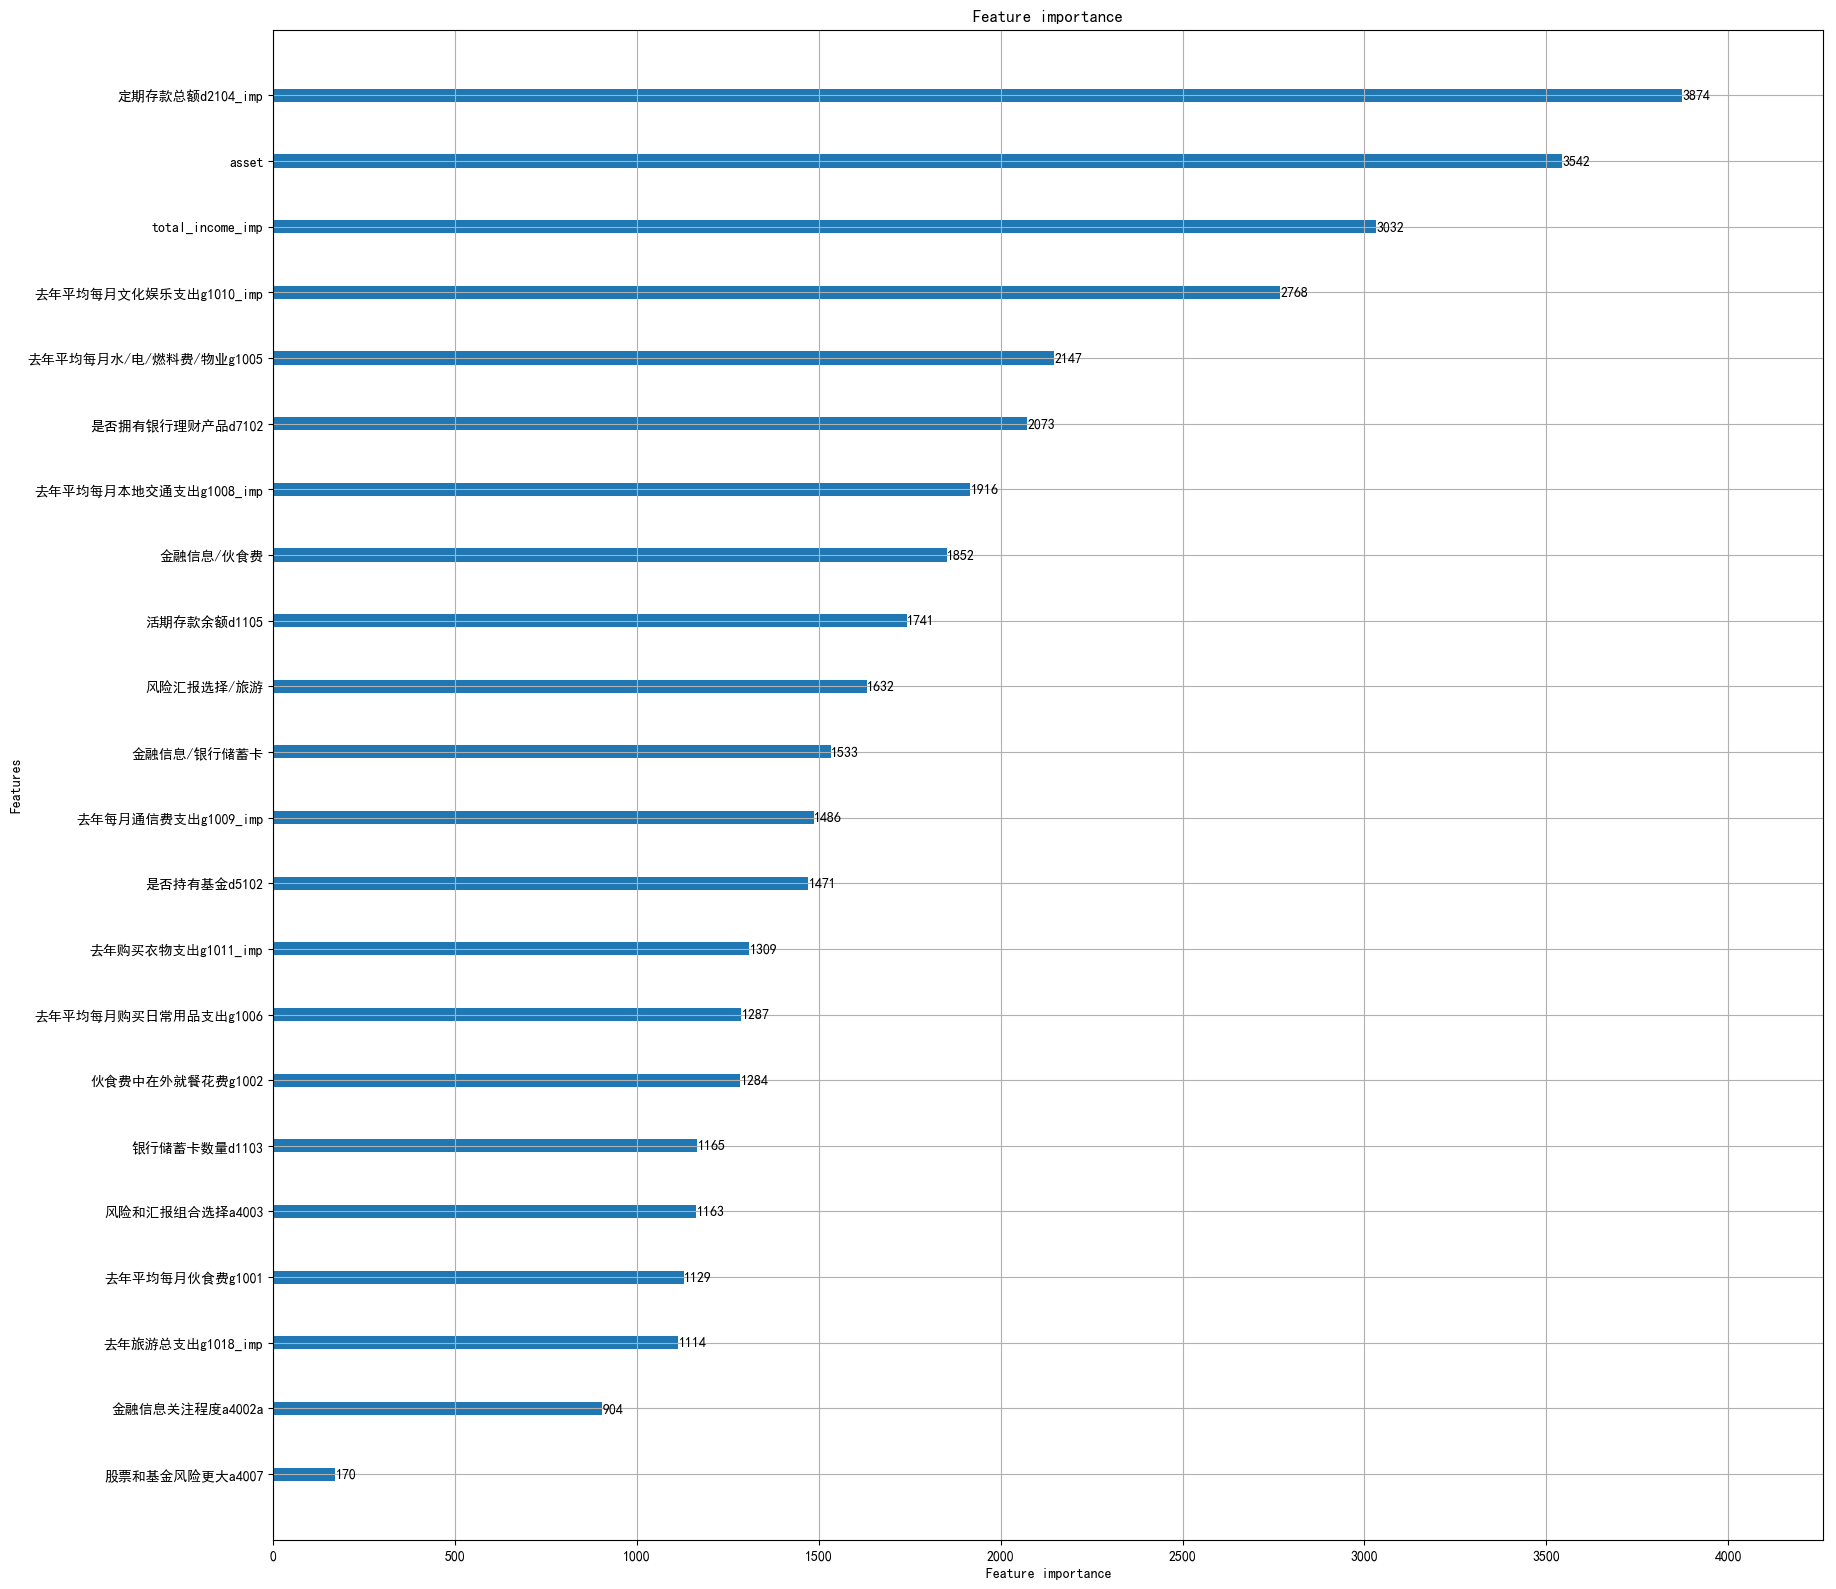

In [60]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['figure.figsize'] = (20.0, 20.0) # 显示大小
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 100
lgb.plot_importance(gbm,ignore_zero=False)
#plt.savefig('./test2.jpg')
plt.show()

In [255]:
import warnings
warnings.filterwarnings("ignore")
from gcforest.gcforest import *
import pandas as pd
from numpy import sort
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

#%%
def get_toy_config():
    config = {}
    ca_config = {}
    ca_config["random_state"] = 0
    ca_config["max_layers"] = 100
    ca_config["early_stopping_rounds"] = 3
    ca_config["n_classes"] = 5
    ca_config["estimators"] = []

    ca_config["estimators"].append({"n_folds": 5, "type": 0, "n_estimators": 400,'num_leaves':10,
     'max_depth':4,
     'subsample':0.8,
     'colsample_bytree':0.8,
     'max_bin':10000,'min_data_in_leaf':10,
     'feature_fraction': 0.7,'lambda_l1':2,
     'lambda_l2': 2,
     'objective': 'multiclass', "silent": True, "nthread": -1, "learning_rate": 0.01})
    ca_config["estimators"].append({"n_folds": 5, 'min_data_in_leaf':10,'num_leaves':12,"type": "XGBClassifier", "n_estimators": 400, "max_depth": 4,"objective": "multiclass",'num_class':5, "silent": True, "nthread": -1, "learning_rate": 0.01})
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "n_estimators": 20, "max_depth":4, "n_jobs": -1})
    ca_config["estimators"].append({"n_folds": 5, "type": "ExtraTreesClassifier", "n_estimators": 30, "max_depth": 4, "n_jobs": -1})
    
    config['silent']=True
    config["cascade"] = ca_config
    config["window"] = 16
    config["stride"] = 2
    return config


# %%
def get_Xy(csv_f):
    X = csv_f.drop(['本期内是否理赔'], axis=1)
    y = csv_f['本期内是否理赔']
    return X, y


#%%
conf = get_toy_config()
gc = GCForest(conf)  # should be a dict
X_train_enc = gc.fit_transform(X_train.as_matrix(), y_train.as_matrix())
#pre_y = gc.predict(X_test.as_matrix())

#%%
#print(classification_report(y_test, pre_y))
#prec = precision_score(test_y, pre_y)
#print("Test Precision of GcForest = {:.2f} %".format(prec * 100))

[ 2019-09-05 22:08:36,316][cascade_classifier.fit_transform] X_groups_train.shape=[(1725, 22)],y_train.shape=(1725,),X_groups_test.shape=no_test,y_test.shape=no_test
[ 2019-09-05 22:08:36,324][cascade_classifier.fit_transform] group_dims=[22]
[ 2019-09-05 22:08:36,330][cascade_classifier.fit_transform] group_starts=[0]
[ 2019-09-05 22:08:36,337][cascade_classifier.fit_transform] group_ends=[22]
[ 2019-09-05 22:08:36,343][cascade_classifier.fit_transform] X_train.shape=(1725, 22),X_test.shape=(0, 22)
[ 2019-09-05 22:08:36,351][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(1725, 22), X_cur_test.shape=(0, 22)
[ 2019-09-05 22:08:40,897][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_0.predict)=58.67%
[ 2019-09-05 22:08:43,148][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_1.predict)=55.78%
[ 2019-09-05 22:08:45,083][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.trai

[ 2019-09-05 22:11:43,150][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_3.predict)=55.65%
[ 2019-09-05 22:11:52,582][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_4.predict)=55.69%
[ 2019-09-05 22:11:52,585][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_cv.predict)=56.99%
[ 2019-09-05 22:11:52,824][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_0.predict)=57.51%
[ 2019-09-05 22:11:53,056][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_1.predict)=55.78%
[ 2019-09-05 22:11:53,284][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_2.predict)=56.52%
[ 2019-09-05 22:11:53,682][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_3.predict)=57.68%
[ 2019-09-05 22:11:53,989][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_4.predict)=58.02%
[ 2019-

[ 2019-09-05 22:14:24,949][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_3 - 5_folds.train_cv.predict)=56.93%
[ 2019-09-05 22:14:24,951][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=55.94%
[ 2019-09-05 22:14:24,954][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=2, accuracy_train=57.33%, accuracy_test=0.00%


In [203]:
X_train.as_matrix().shape

(1725, 22)

In [223]:
y_pred=gc.predict_proba(X_test.as_matrix())
y_true=y_test
y=[]
for i in range(len(y_pred)):
    y_pred[i][0]=y_pred[i][0]-0.2
    y_pred[i][1]=y_pred[i][1]
    y_pred[i][3]=y_pred[i][3]
    y_pred[i][4]=y_pred[i][4]
    max_value=max(y_pred[i])
    for j in range(len(y_pred[i])):
        if max_value==y_pred[i][j]:
            y.append(j)

#print(y)
#print(y_true)
            
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(y_true,y,target_names = target_names ))

[ 2019-09-05 20:44:59,646][cascade_classifier.transform] X_groups_test.shape=[(406, 22)]
[ 2019-09-05 20:44:59,652][cascade_classifier.transform] group_dims=[22]
[ 2019-09-05 20:44:59,657][cascade_classifier.transform] X_test.shape=(406, 22)
[ 2019-09-05 20:44:59,662][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(406, 22)
[ 2019-09-05 20:45:02,001][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(406, 42)


              precision    recall  f1-score   support

     class 0       0.95      0.78      0.86       288
     class 1       0.15      0.26      0.19        31
     class 2       0.37      0.63      0.46        41
     class 3       0.30      0.25      0.27        32
     class 4       0.12      0.14      0.13        14

    accuracy                           0.67       406
   macro avg       0.38      0.41      0.38       406
weighted avg       0.75      0.67      0.70       406



In [229]:
from sklearn.externals import joblib
joblib.dump(gc,'g_model.pkl')
#clf=joblib.load('filename.pkl')

['g_model.pkl']

In [234]:
d.iloc[0,1:]

金融信息关注程度a4002a           2.000000e+00
风险和汇报组合选择a4003           3.000000e+00
股票和基金风险更大a4007           1.000000e+00
银行储蓄卡数量d1103             3.000000e+00
活期存款余额d1105              2.000000e+04
定期存款总额d2104_imp          1.500000e+05
是否持有基金d5102              2.000000e+00
是否拥有银行理财产品d7102          2.000000e+00
去年平均每月伙食费g1001           5.000000e+03
伙食费中在外就餐花费g1002          2.000000e+03
去年平均每月购买日常用品支出g1006      3.000000e+01
去年平均每月本地交通支出g1008_imp    4.000000e+01
去年每月通信费支出g1009_imp       9.999999e+01
去年平均每月文化娱乐支出g1010_imp    5.000000e+01
去年购买衣物支出g1011_imp        9.000001e+02
去年旅游总支出g1018_imp         0.000000e+00
去年平均每月水/电/燃料费/物业g1005    1.500000e+02
asset                    1.439698e+06
total_income_imp         1.095200e+05
金融信息/银行储蓄卡               6.666444e-01
金融信息/伙食费                 3.999999e-01
风险汇报选择/旅游                3.000000e+04
Name: 0, dtype: float64

In [246]:
k=d.drop(['风险等级'],axis=1)
k.iloc[0,:].as_matrix().reshape(1,22)

array([[2.00000000e+00, 3.00000000e+00, 1.00000000e+00, 3.00000000e+00,
        2.00000000e+04, 1.50000000e+05, 2.00000000e+00, 2.00000000e+00,
        5.00000000e+03, 2.00000000e+03, 3.00000000e+01, 4.00000000e+01,
        9.99999924e+01, 5.00000000e+01, 9.00000122e+02, 0.00000000e+00,
        1.50000000e+02, 1.43969812e+06, 1.09520000e+05, 6.66644445e-01,
        3.99999920e-01, 3.00000000e+04]])

In [254]:
clf = joblib.load('g_model.pkl')
#print(d.iloc[0,1:])
#print(len(d.iloc[0,1:]))
#print(m)
y_true=y_test
y_pred=clf.predict_proba(k.iloc[0,:].as_matrix().reshape(1,22))
print(y_pred)
y=[]
for i in range(len(y_pred)):
    y_pred[i][0]=y_pred[i][0]-0.2
    y_pred[i][1]=y_pred[i][1]
    y_pred[i][2]=y_pred[i][2]
    y_pred[i][3]=y_pred[i][3]
    y_pred[i][4]=y_pred[i][4]
    max_value=max(y_pred[i])
    for j in range(len(y_pred[i])):
        if max_value==y_pred[i][j]:
            y.append(j)
                
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(y_true,y,target_names = target_names ))

[ 2019-09-05 22:02:48,550][cascade_classifier.transform] X_groups_test.shape=[(1, 22)]
[ 2019-09-05 22:02:48,555][cascade_classifier.transform] group_dims=[22]
[ 2019-09-05 22:02:48,559][cascade_classifier.transform] X_test.shape=(1, 22)
[ 2019-09-05 22:02:48,562][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1, 22)
[ 2019-09-05 22:02:49,731][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(1, 42)


[[0.22491634 0.24625485 0.20655198 0.23134781 0.09092904]]


ValueError: Found input variables with inconsistent numbers of samples: [406, 1]

In [750]:
X_test.iloc[0,:].as_matrix().reshape(22,1).shape

(22, 1)